# Setup and Load the Chat Log

In [22]:

file_path = "/kaggle/input/chat-bot/AI chat.txt"

with open(file_path, "r", encoding="utf-8") as f:
    chat_log = f.readlines()


for line in chat_log:
    print(line.strip())


User: Hi
AI: Hello! How can I assist you today?
User: I will ask you some questions. you have to answer them shortly.
AI: Got it! Short answers coming your way. Ask away!
User: What is an operating system?
AI: Software that manages computer hardware and software resources.
User: What are the main functions of an OS?
AI: Manages hardware, Runs apps, Handles memory, Controls files, Provides UI
User: What is a process?
AI: A running program.
User: What is a thread?
AI: A lightweight sub-process (part of a process).
User: What is the difference between a process and a thread?
AI: Process: Independent, has its own memory. Thread: Runs inside a process, shares memory.
User: What is a system call?
AI: A request from software to the OS for a service.
User: What is virtual memory?
AI: An illusion of more RAM using disk space.
User: What is paging?
AI: Dividing memory into fixed-size blocks (pages).
User: What is a page table?
AI: Maps virtual pages to physical frames.
User: What is context swit

# Parse the Chat Log

In [23]:

user_msgs = []
ai_msgs = []

for line in chat_log:
    line = line.strip()
    if line.startswith("User:"):
        user_msgs.append(line[5:].strip())
    elif line.startswith("AI:"):
        ai_msgs.append(line[3:].strip())


print("User Messages:", user_msgs)
print('\n\n')
print("AI Messages:", ai_msgs)


User Messages: ['Hi', 'I will ask you some questions. you have to answer them shortly.', 'What is an operating system?', 'What are the main functions of an OS?', 'What is a process?', 'What is a thread?', 'What is the difference between a process and a thread?', 'What is a system call?', 'What is virtual memory?', 'What is paging?', 'What is a page table?', 'What is context switching?', 'What are the different states of a process?', 'What is a process control block (PCB)?', 'What are preemptive and non-preemptive scheduling?', 'What is a deadlock?', 'What is a file system?', 'Name three common operating systems used on personal computers.', 'What is a shell in an operating system?', 'What is the difference between a 32-bit and a 64-bit operating system?']



AI Messages: ['Hello! How can I assist you today?', 'Got it! Short answers coming your way. Ask away!', 'Software that manages computer hardware and software resources.', 'Manages hardware, Runs apps, Handles memory, Controls files

# Count Message Statistics

In [24]:
total_msgs = len(user_msgs) + len(ai_msgs)
print(f"Total messages: {total_msgs}")
print(f"User messages: {len(user_msgs)}")
print(f"AI messages: {len(ai_msgs)}")

Total messages: 40
User messages: 20
AI messages: 20


# Keyword Extraction

In [25]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re


nltk.download("stopwords")


all_text = " ".join(user_msgs + ai_msgs).lower()
words = re.findall(r'\b\w+\b', all_text)


filtered_words = [w for w in words if w not in stopwords.words('english')]


word_counts = Counter(filtered_words)
top_keywords = word_counts.most_common(5)


print("Top 5 keywords:", top_keywords)


Top 5 keywords: [('process', 10), ('system', 6), ('memory', 5), ('operating', 4), ('os', 4)]


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Generate Final Summary

In [26]:
if top_keywords:
    
    keywords_only = [word for word, _ in top_keywords]
    topic_inferred = ", ".join(keywords_only[:3])  # pick top 3 to describe the topic
else:
    topic_inferred = "various topics"


summary = f"""
Summary:
- The conversation had {total_msgs} exchanges.
- It covered topics such as {topic_inferred}.
- Most common keywords: {', '.join(keywords_only)}.
"""

print(summary)



Summary:
- The conversation had 40 exchanges.
- It covered topics such as process, system, memory.
- Most common keywords: process, system, memory, operating, os.



# Keyword Extraction Using TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [28]:

docs = user_msgs + ai_msgs


vectorizer = TfidfVectorizer(stop_words='english')  # remove common English stopwords
tfidf_matrix = vectorizer.fit_transform(docs)


tfidf_scores = np.sum(tfidf_matrix.toarray(), axis=0)


words = vectorizer.get_feature_names_out()
tfidf_dict = dict(zip(words, tfidf_scores))


top_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:5]


print("Top 5 TF-IDF Keywords:", top_tfidf)


Top 5 TF-IDF Keywords: [('process', 3.8292824132806786), ('operating', 2.2896469727213598), ('thread', 1.9083334123113866), ('memory', 1.7766259275959082), ('deadlock', 1.3257926952058845)]


In [29]:

keywords_only = [word for word, _ in top_tfidf]

summary_tfidf = f"""
Summary (with TF-IDF):
- The conversation had {total_msgs} exchanges.
- It covered topics such as {', '.join(keywords_only[:3])}.
- Most informative keywords: {', '.join(keywords_only)}.
"""

print(summary_tfidf)



Summary (with TF-IDF):
- The conversation had 40 exchanges.
- It covered topics such as process, operating, thread.
- Most informative keywords: process, operating, thread, memory, deadlock.



# AI-Based Text Summarization with Transformers

In [30]:
!pip install transformers --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [31]:
from transformers import pipeline

summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")  # Lighter than full BART

Device set to use cpu


In [32]:

full_conversation = "\n".join([f"User: {msg}" for msg in user_msgs] + 
                              [f"AI: {msg}" for msg in ai_msgs])


In [33]:

ai_summary = summarizer(full_conversation, max_length=100, min_length=30, do_sample=False)


print("AI-Generated Summary:")
print(ai_summary[0]['summary_text'])


AI-Generated Summary:
 User: Hi: I will ask you some questions. you have to answer them shortly. What is an operating system? What is the main functions of an OS? What are preemptive and non-preemptive scheduling?


# Summary of the full projects

Total messages: 40
User messages: 20
AI messages: 20


User Topics:
Topic 1: thread, difference, process, system, operating
Topic 2: system, difference, operating, process, thread
Topic 3: process, operating, system, thread, difference


AI Topics:
Topic 1: disk, space, data, page, process
Topic 2: task, process, memory, waiting, run
Topic 3: software, program, running, managing, file


Overall Topics:
Topic 1: system, software, operating, program, shell
Topic 2: process, bit, ask, difference, answer
Topic 3: page, state, process, block, nonpreemptive




[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


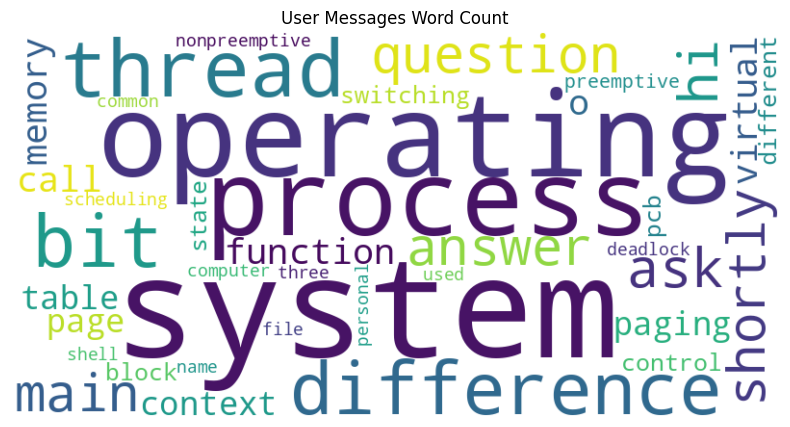

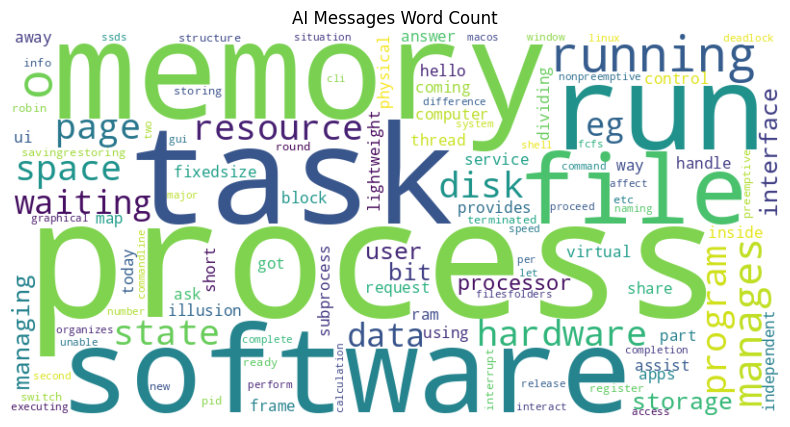

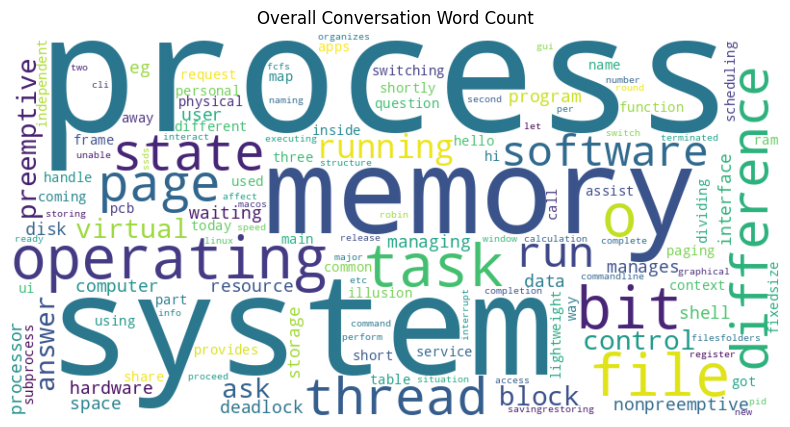

Most common user words:
[('system', 6), ('operating', 4), ('process', 4), ('thread', 2), ('difference', 2), ('bit', 2), ('hi', 1), ('ask', 1), ('question', 1), ('answer', 1), ('shortly', 1), ('main', 1), ('function', 1), ('o', 1), ('call', 1), ('virtual', 1), ('memory', 1), ('paging', 1), ('page', 1), ('table', 1)]

Most common AI words:
[('process', 6), ('memory', 4), ('task', 4), ('software', 3), ('run', 3), ('file', 3), ('running', 3), ('o', 3), ('manages', 2), ('hardware', 2), ('resource', 2), ('program', 2), ('disk', 2), ('space', 2), ('page', 2), ('state', 2), ('waiting', 2), ('data', 2), ('eg', 2), ('storage', 2)]

Most common overall words:
[('process', 10), ('system', 7), ('memory', 5), ('operating', 4), ('o', 4), ('file', 4), ('bit', 4), ('task', 4), ('thread', 3), ('difference', 3), ('page', 3), ('state', 3), ('software', 3), ('run', 3), ('running', 3), ('ask', 2), ('answer', 2), ('virtual', 2), ('control', 2), ('block', 2)]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


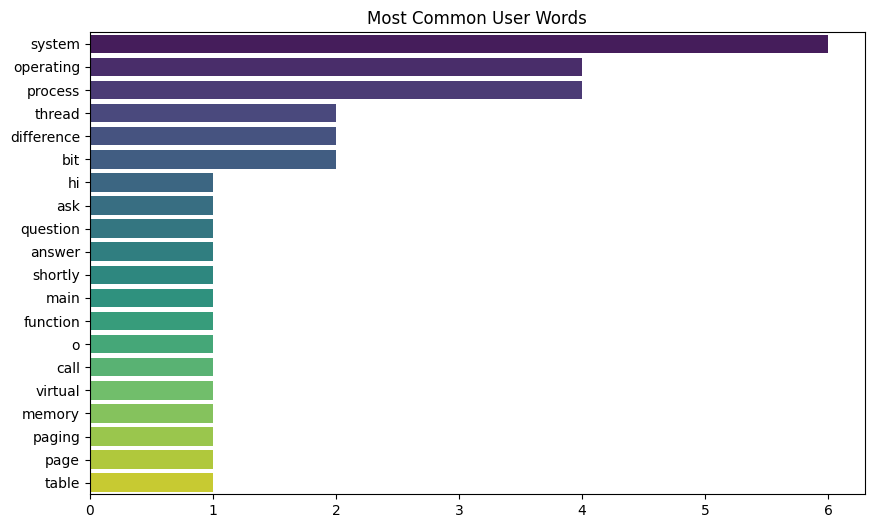

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


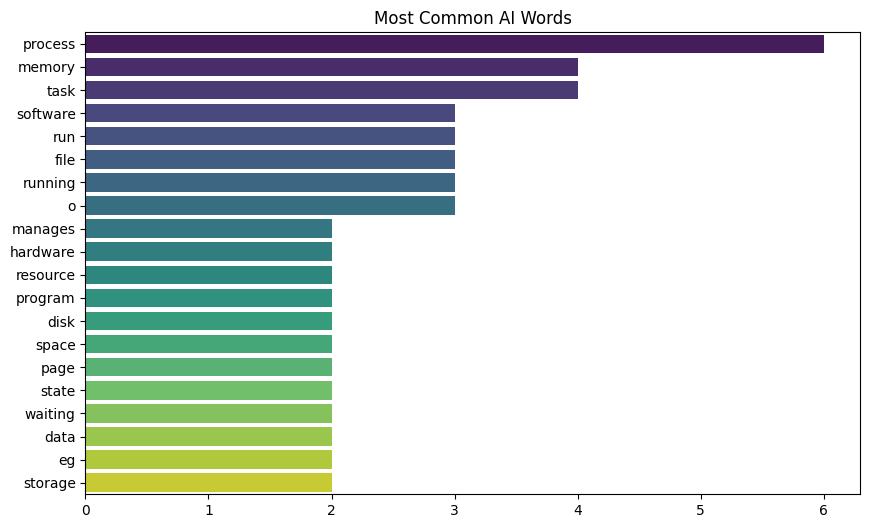

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


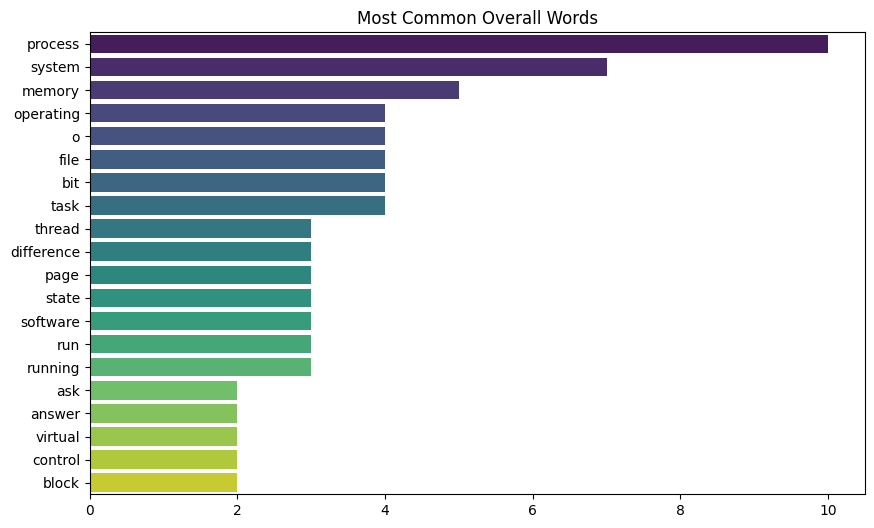

In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text):
    """
    Preprocess text by:
    1. Converting to lowercase
    2. Removing special characters
    3. Tokenizing
    4. Removing stopwords
    5. Lemmatizing
    """
    
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

def load_and_preprocess_chat(file_path):
    """
    Load chat file and preprocess the text
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    
    user_messages = []
    ai_messages = []
    
    for line in lines:
        if line.startswith("User:"):
            user_messages.append(line.replace("User:", "").strip())
        elif line.startswith("AI:"):
            ai_messages.append(line.replace("AI:", "").strip())
    

    user_messages_processed = [preprocess_text(msg) for msg in user_messages]
    ai_messages_processed = [preprocess_text(msg) for msg in ai_messages]
    
    return user_messages, ai_messages, user_messages_processed, ai_messages_processed


def analyze_topics(messages, n_topics=3, n_top_words=5):
    """
    Analyze topics using LDA
    """
    # Create TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
    tfidf = tfidf_vectorizer.fit_transform(messages)
    
    
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', random_state=42)
    lda.fit(tfidf)
    
    
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    
    
    topics = {}
    for topic_idx, topic in enumerate(lda.components_):
        top_features = [tfidf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"Topic {topic_idx + 1}"] = top_features
    
    return topics

def generate_word_cloud(text, title):
    """
    Generate and display word cloud
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


def get_most_common_words(texts, n=20):
    """
    Get most common words from a list of texts
    """
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)


def plot_common_words(common_words, title):
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(title)
    plt.show()


def analyze_chat(file_path):
    """
    Main function to analyze chat file
    """
    
    user_msgs, ai_msgs, user_msgs_processed, ai_msgs_processed = load_and_preprocess_chat(file_path)
    
    
    all_msgs = user_msgs + ai_msgs
    all_msgs_processed = user_msgs_processed + ai_msgs_processed
    
    
    print(f"Total messages: {len(all_msgs)}")
    print(f"User messages: {len(user_msgs)}")
    print(f"AI messages: {len(ai_msgs)}")
    print("\n")
    
    
    print("User Topics:")
    user_topics = analyze_topics(user_msgs_processed)
    for topic, words in user_topics.items():
        print(f"{topic}: {', '.join(words)}")
    print("\n")
    
    
    print("AI Topics:")
    ai_topics = analyze_topics(ai_msgs_processed)
    for topic, words in ai_topics.items():
        print(f"{topic}: {', '.join(words)}")
    print("\n")
    

    print("Overall Topics:")
    overall_topics = analyze_topics(all_msgs_processed)
    for topic, words in overall_topics.items():
        print(f"{topic}: {', '.join(words)}")
    print("\n")
    
    
    generate_word_cloud(' '.join(user_msgs_processed), "User Messages Word Count")
    generate_word_cloud(' '.join(ai_msgs_processed), "AI Messages Word Count")
    generate_word_cloud(' '.join(all_msgs_processed), "Overall Conversation Word Count")
    
    
    user_common = get_most_common_words(user_msgs_processed)
    ai_common = get_most_common_words(ai_msgs_processed)
    all_common = get_most_common_words(all_msgs_processed)
    
    
    print("Most common user words:")
    print(user_common)
    print("\nMost common AI words:")
    print(ai_common)
    print("\nMost common overall words:")
    print(all_common)
    
    
    plot_common_words(user_common, "Most Common User Words")
    plot_common_words(ai_common, "Most Common AI Words")
    plot_common_words(all_common, "Most Common Overall Words")
    
    return {
        'user_topics': user_topics,
        'ai_topics': ai_topics,
        'overall_topics': overall_topics,
        'user_common_words': user_common,
        'ai_common_words': ai_common,
        'all_common_words': all_common
    }

file_path = '/kaggle/input/chat-bot/AI chat.txt'  

analysis_results = analyze_chat(file_path)